In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [77]:
def G(r, x):
    return r * x * (1 - x)

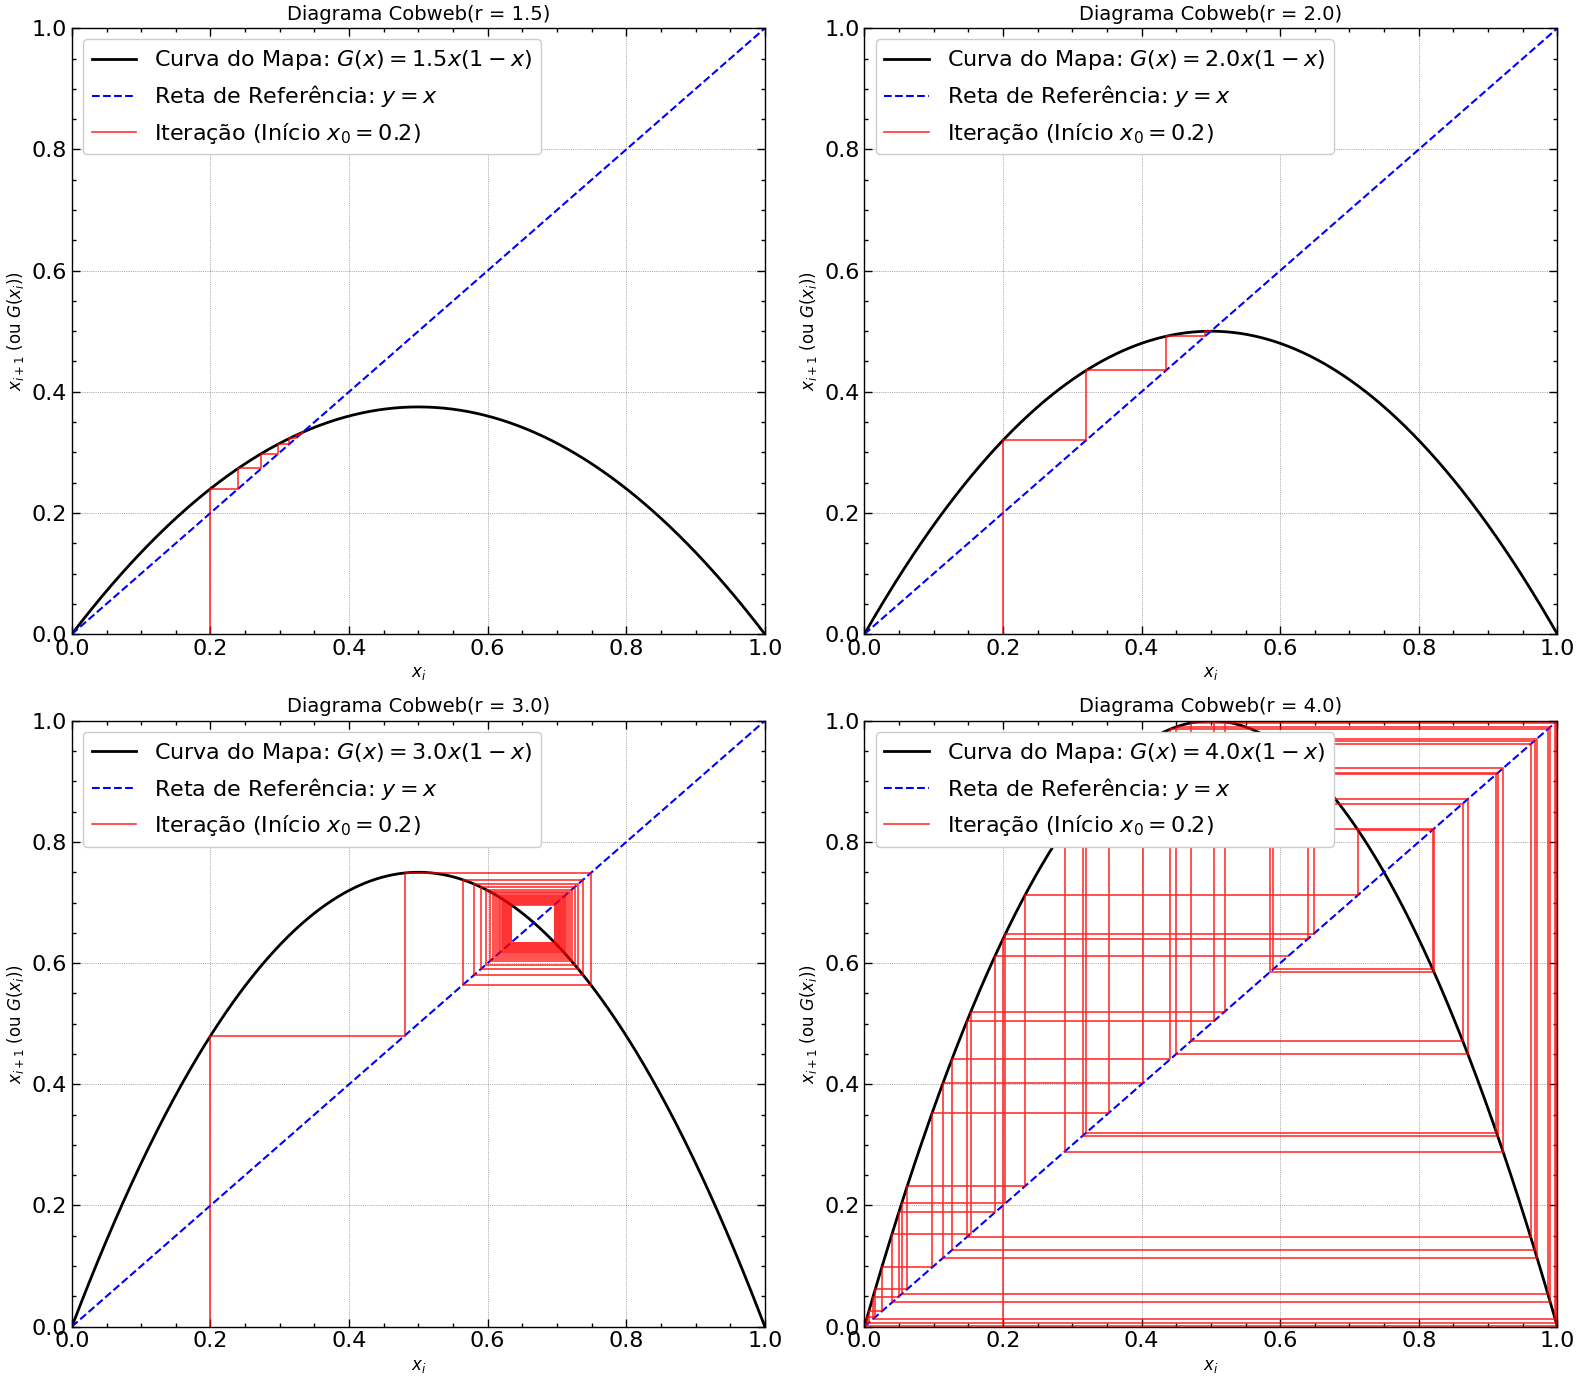

In [78]:
import numpy as np
import matplotlib.pyplot as plt


def plot_cobweb(ax, r, x0, max_iter=50):
    x_range = np.linspace(0, 1, 500)
    
    ax.plot(x_range, G(r, x_range), 'k', lw=2, label=f'Curva do Mapa: $G(x) = {r}x(1-x)$')
    
    ax.plot(x_range, x_range, 'b', ls='--', lw=1.5, label='Reta de Referência: $y = x$')
    
    x_i = x0
    
    path_x = [x_i]
    path_y = [0]  

    for i in range(max_iter):
        x_i_plus_1 = G(r, x_i)
     
        path_x.append(x_i)
        path_y.append(x_i_plus_1)
        path_x.append(x_i_plus_1)
        path_y.append(x_i_plus_1)
        
        x_i = x_i_plus_1

    ax.plot(path_x, path_y, 'r-', lw=1.2, alpha=0.8, label=f'Iteração (Início $x_0 = {x0}$)')
    
    ax.set_title(f'Diagrama Cobweb(r = {r})', fontsize=14)
    ax.set_xlabel('$x_i$', fontsize=12)
    ax.set_ylabel('$x_{i+1}$ (ou $G(x_i)$)', fontsize=12)
 
    ax.set_xlim(0, 1)
    if r <= 3:
        ax.set_ylim(0, 1)
    else:
        ax.set_ylim(0, r/4) 
        
    ax.legend(loc='upper left')
    ax.grid(True, linestyle=':', alpha=0.6)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))
plot_cobweb(ax=ax1, r=1.5, x0=0.2)
plot_cobweb(ax=ax2, r=2.0, x0=0.2)
plot_cobweb(ax=ax3, r=3.0, x0=0.2)
plot_cobweb(ax=ax4, r=4.0, x0=0.2)

plt.tight_layout()

In [79]:
def gerar_evolucao_temporal(r, x0, n_iter):
    x_array = np.zeros(n_iter + 1)
    x_array[0] = x0
    
    for i in range(n_iter):
        x_array[i+1] = G(r, x_array[i])
        
    return x_array

def plotar_evolucao_temporal(ax, r, x0, n_iter, **kwargs):
    n_array = np.arange(n_iter + 1)
    x_evolucao = gerar_evolucao_temporal(r, x0, n_iter)
    
    if 's' not in kwargs:
        kwargs['s'] = 1  
    if 'alpha' not in kwargs:
        kwargs['alpha'] = 0.7 
    if 'label' not in kwargs:
        kwargs['label'] = f'r = {r}' 
        
    # 3. Plotar os dados no eixo (ax)
    ax.scatter(n_array, x_evolucao, **kwargs)
    
    # 4. Configurar o básico do eixo
    ax.set_xlabel('$i$ (Número da Iteração)', fontsize=12)
    ax.set_ylabel('$X_i$ (Valor da População)', fontsize=12)
    ax.set_xlim(0, n_iter)
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True, linestyle=':', alpha=0.7)

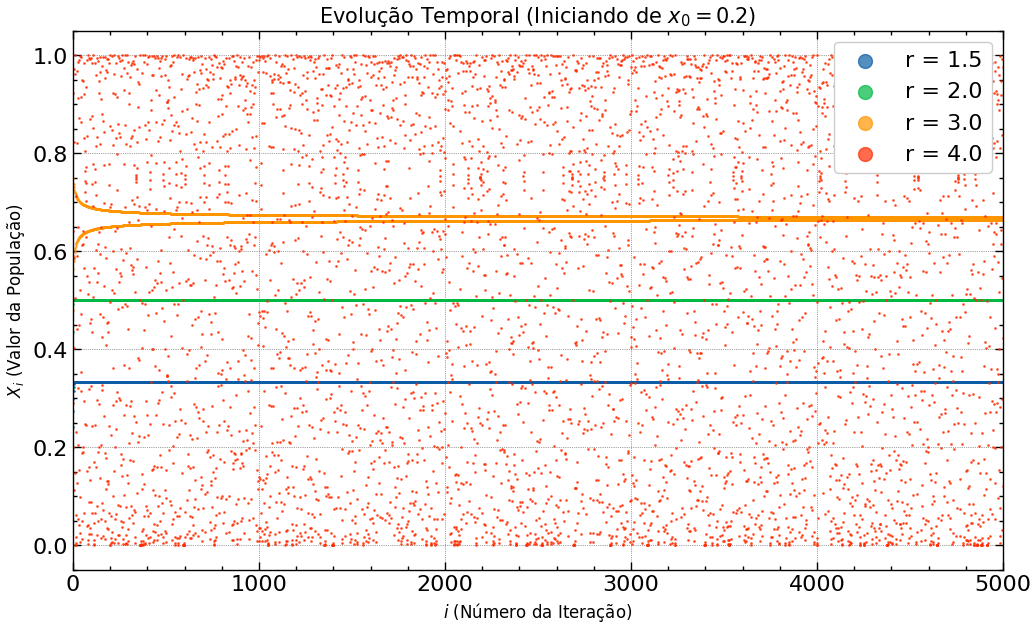

In [80]:
r_valores = [1.5, 2.0, 3.0, 4.0]
x0_inicial = 0.2
N_ITERACOES = 5000 

fig, ax_unico = plt.subplots(figsize=(12, 7))

for r_val in r_valores:
    plotar_evolucao_temporal(ax_unico, r_val, x0_inicial, N_ITERACOES)

ax_unico.set_title(f'Evolução Temporal (Iniciando de $x_0 = {x0_inicial}$)', fontsize=15)
leg = ax_unico.legend(loc='upper right', markerscale=10)

Text(0, 0.5, 'Todos os $x_i$ encontrados')

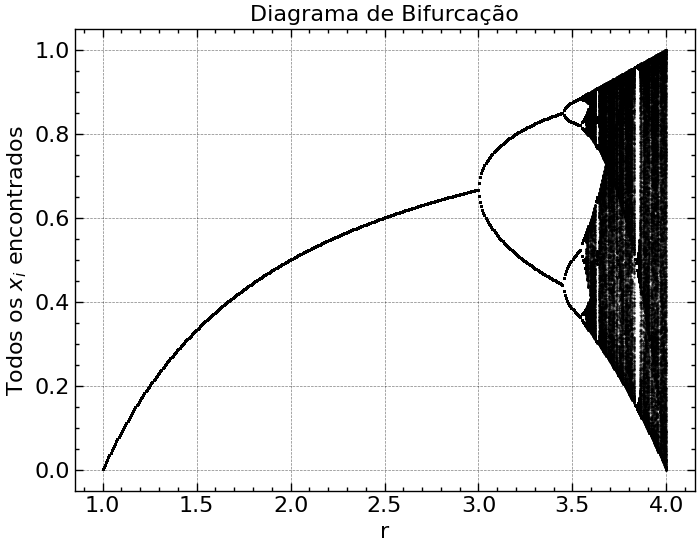

In [81]:
# Diagrama de Bifurcações

r_valores = np.linspace(1, 4, 500) #x_data
x0_inicial = 0.2
N_ITERACOES = 3000 

for i in range(len(r_valores)): 
    sequencia = gerar_evolucao_temporal(r_valores[i], x0_inicial, N_ITERACOES)
    plt.scatter([r_valores[i] for k in range(N_ITERACOES+1)][2000:], sequencia[2000:], s =1 ,marker='.' ,color = 'black', alpha = 0.5)

plt.title("Diagrama de Bifurcação")
plt.xlabel("r")
plt.ylabel("Todos os $x_i$ encontrados")

In [82]:
def plot_data(i_iter, x_i_pop, d_i_dist, r_val, x0_val, eps_val, A, lambda_val, i_min, i_max):
    fig, (ax1, ax2) = plt.subplots(
        2, 1, 
        figsize=(12, 10), 
        sharex=True 
    )

    ax1.plot(i_iter, x_i_pop, '.', label=' $x_i$')
    
    # Título atualizado para incluir os parâmetros da simulação
    title = (f'Evolução Temporal e Divergência)\n'
             f'(Valores: $r={r_val}$, $x_0={x0_val}$, $\\epsilon={eps_val}$)')
    ax1.set_title(title, fontsize=16)
    
    ax1.set_ylabel('$x_i$', fontsize=12)
    ax1.legend(loc='upper right', markerscale=3)
    ax1.grid(True, linestyle=':', alpha=0.6)
    ax1.set_ylim(-0.05, 1.05)

    ax2.semilogy(i_iter, d_i_dist, '.', label='Distância $d(i) = |x_i^\prime - x_i|$',color = 'red')
    ax2.plot(i_iter[i_min:i_max], A*np.exp(lambda_val*i_iter[i_min:i_max]), label = 'Fit: $A e^{\\lambda i}$')
    
    ax2.set_xlabel('Iteração $i$', fontsize=12)
    ax2.set_ylabel('Distância $d(i)$ (Escala Log)', fontsize=12)
    ax2.legend(loc='lower right')
    ax2.grid(True, which='both', linestyle=':', alpha=0.6) # Grid em log

    plt.tight_layout()
    plt.show()


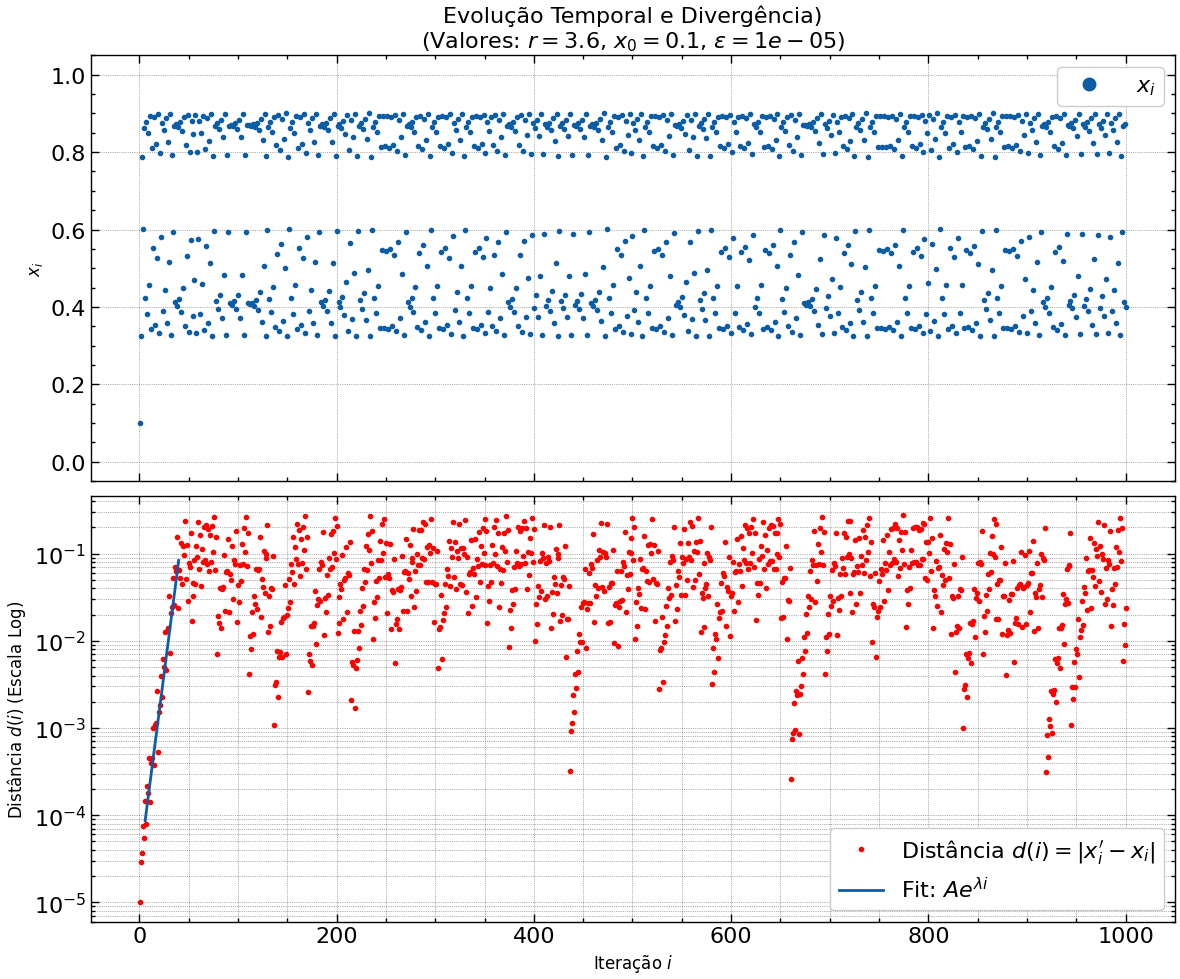

In [83]:
FILENAME = 'graphics_A_data/1.dat'
data = np.loadtxt(FILENAME)
i = data[:, 0]
x_i = data[:, 1]
d_i = data[:, 2]

plot_data(i, x_i, d_i, r_val=3.6, x0_val=0.1, eps_val=1e-5, A = np.exp(-10.571640205763522), lambda_val = 0.20226851442207094, i_min = 5, i_max = 40)